In [5]:
%pip install seaborn
%pip install sklearn
%pip install xgboost imblearn

Note: you may need to restart the kernel to use updated packages.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=dcfa25b9ba107902f9542728344651600f4786ec7fa8f603164bd406d9fd4cf9
  Stored in directory: /home/tsuki/.cache/pip/wheels/5f/28/a6/4e4fc2959e4ed9b33bf517703534fd8b19b76a842f74c9ed4c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

In [7]:
train_data = pd.read_csv("./train.csv")
df_train = pd.read_csv("./train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
rdm = RandomUnderSampler()
X, Y = rdm.fit_resample(X, Y)

NameError: name 'X' is not defined

In [10]:
train_data = pd.concat([X, Y], axis=1)

NameError: name 'X' is not defined

In [11]:
test_data = pd.read_csv("./test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")
combine = [train, test]
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [16]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [19]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [22]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


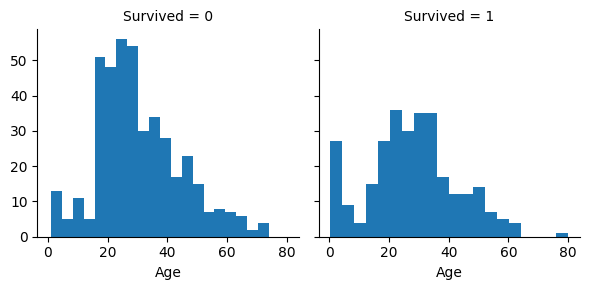

In [23]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

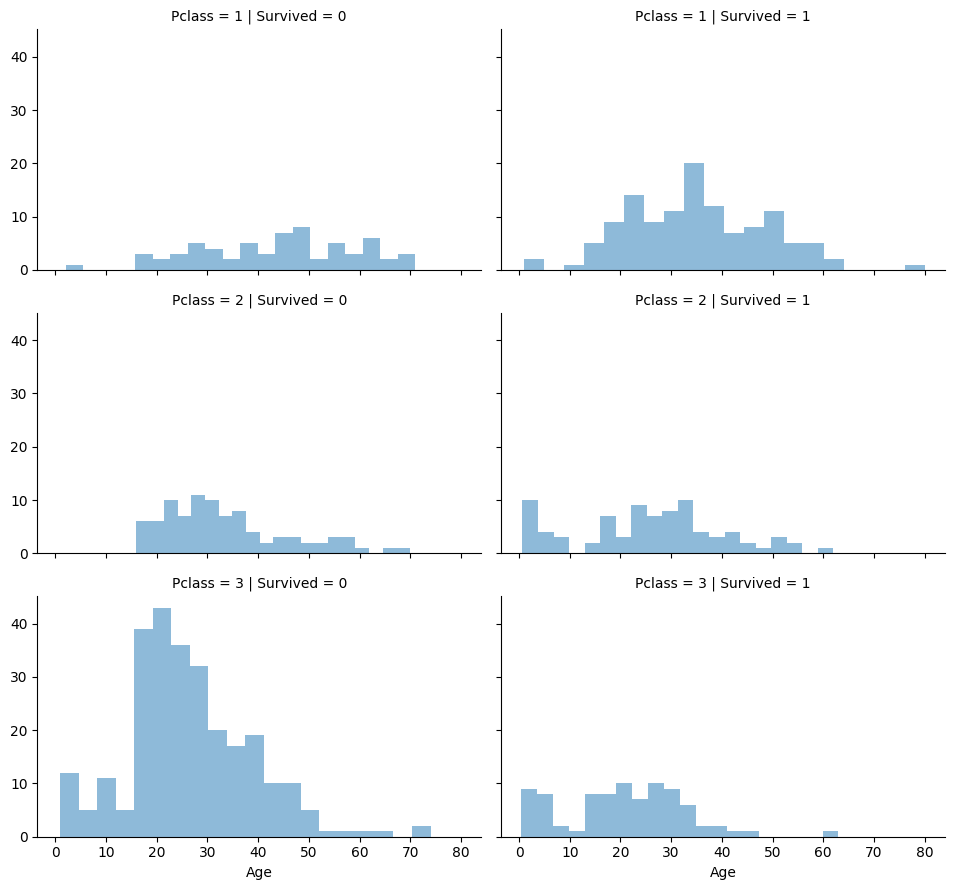

In [24]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


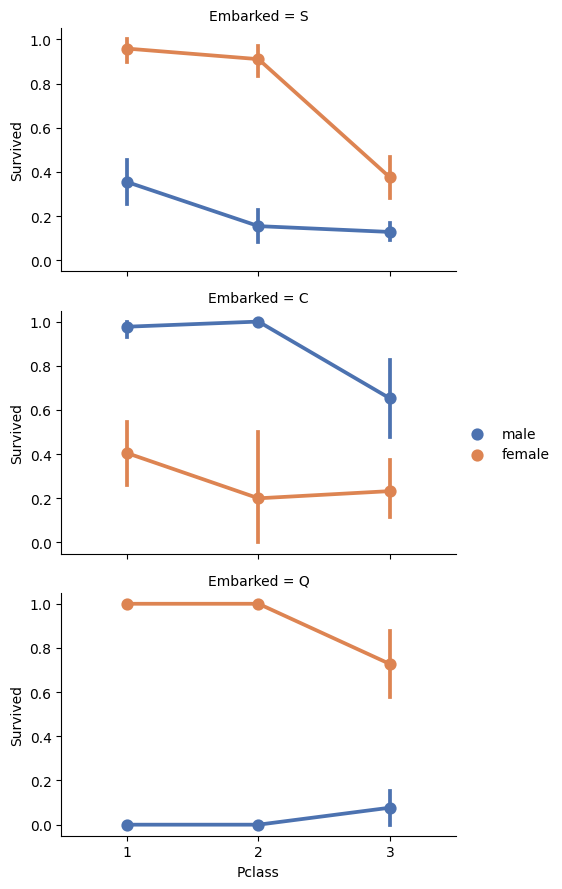

In [25]:
grid = sns.FacetGrid(train, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/seaborn/axis

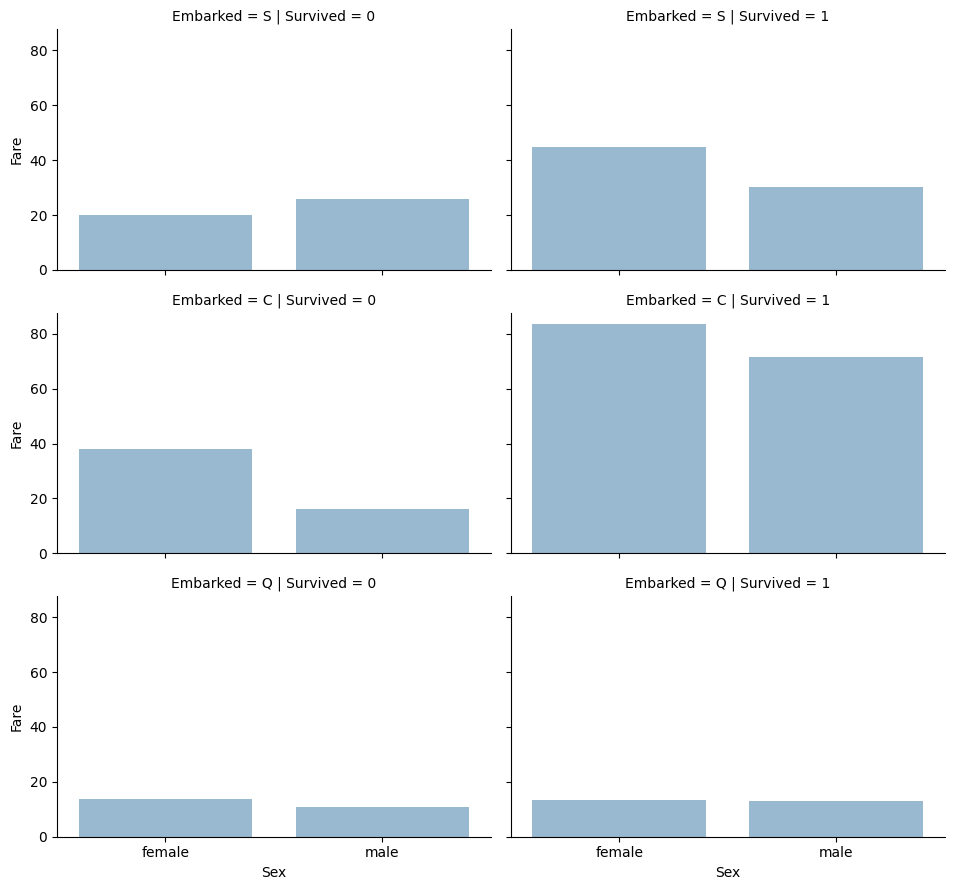

In [26]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [27]:
print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

"After", train.shape, test.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [28]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [29]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [30]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [31]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 9), (418, 9))

In [32]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1,'male': 0 }).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


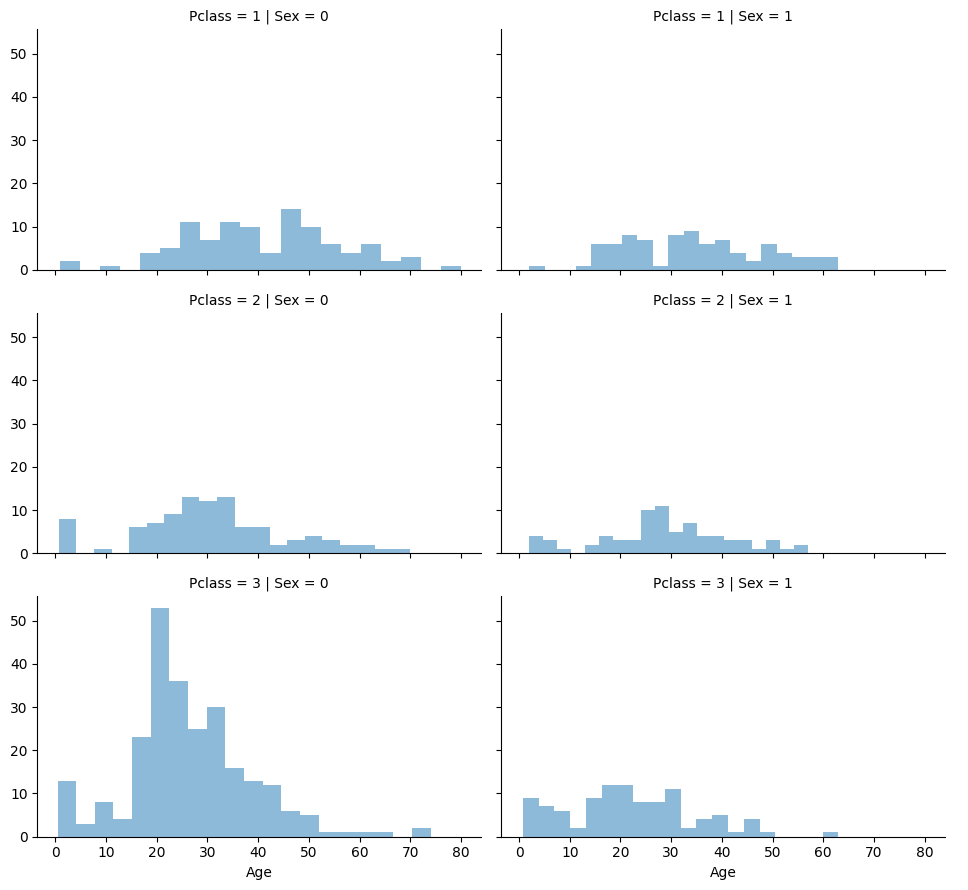

In [33]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [34]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [35]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i, j] = int(age_guess/0.5 + 0.5) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i, j]
    dataset['Age'] = dataset['Age'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [36]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [37]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64,'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [38]:
train = train.drop(['AgeBand'], axis = 1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [39]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [40]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,0
1,1,1,1,2,1,0,71.2833,C,3,2,0
2,1,3,1,1,0,0,7.9250,S,2,1,1
3,1,1,1,2,1,0,53.1000,S,3,2,0
4,0,3,0,2,0,0,8.0500,S,1,1,1


In [42]:
guess_fare = np.zeros((2,3))
guess_fare

array([[0., 0., 0.],
       [0., 0., 0.]])

In [43]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Fare'].dropna()
            fare_guess = guess.median()
            guess_fare[i, j] = int(fare_guess/0.5 + 0.5) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Fare.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Fare'] = guess_fare[i, j]
    dataset['Fare'] = dataset['Fare'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7,S,1,2,0
1,1,1,1,2,1,0,71,C,3,2,0
2,1,3,1,1,0,0,7,S,2,1,1
3,1,1,1,2,1,0,53,S,3,2,0
4,0,3,0,2,0,0,8,S,1,1,1


In [44]:
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
886,0,2,0,1,0,0,13,S,5,1,1
887,1,1,1,1,0,0,30,S,2,1,1
888,0,3,1,1,1,2,23,S,2,4,0
889,1,1,0,1,0,0,30,C,1,1,1
890,0,3,0,1,0,0,7,Q,1,1,1


In [45]:
train['FareBand'] = pd.cut(train['Fare'], 5)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 102.4]",0.361575
1,"(102.4, 204.8]",0.757576
2,"(204.8, 307.2]",0.647059
3,"(307.2, 409.6]",NaN
4,"(409.6, 512.0]",1.000000


In [46]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 102.4, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 102.4) & (dataset['Fare'] <= 204.8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 204.8) & (dataset['Fare'] <= 307.2), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 307.2) & (dataset['Fare'] <= 409.6), 'Fare'] = 3
    dataset.loc[dataset['Fare'] > 409.6,'Fare']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBand
0,0,3,0,1,1,0,0,S,1,2,0,"(-0.512, 102.4]"
1,1,1,1,2,1,0,0,C,3,2,0,"(-0.512, 102.4]"
2,1,3,1,1,0,0,0,S,2,1,1,"(-0.512, 102.4]"
3,1,1,1,2,1,0,0,S,3,2,0,"(-0.512, 102.4]"
4,0,3,0,2,0,0,0,S,1,1,1,"(-0.512, 102.4]"


In [47]:
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBand
886,0,2,0,1,0,0,0,S,5,1,1,"(-0.512, 102.4]"
887,1,1,1,1,0,0,0,S,2,1,1,"(-0.512, 102.4]"
888,0,3,1,1,1,2,0,S,2,4,0,"(-0.512, 102.4]"
889,1,1,0,1,0,0,0,C,1,1,1,"(-0.512, 102.4]"
890,0,3,0,1,0,0,0,Q,1,1,1,"(-0.512, 102.4]"


In [48]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBand
0,0,3,0,1,1,0,0,S,1,2,0,"(-0.512, 102.4]"
1,1,1,1,2,1,0,0,C,3,2,0,"(-0.512, 102.4]"
2,1,3,1,1,0,0,0,S,2,1,1,"(-0.512, 102.4]"
3,1,1,1,2,1,0,0,S,3,2,0,"(-0.512, 102.4]"
4,0,3,0,2,0,0,0,S,1,1,1,"(-0.512, 102.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,0,S,5,1,1,"(-0.512, 102.4]"
887,1,1,1,1,0,0,0,S,2,1,1,"(-0.512, 102.4]"
888,0,3,1,1,1,2,0,S,2,4,0,"(-0.512, 102.4]"
889,1,1,0,1,0,0,0,C,1,1,1,"(-0.512, 102.4]"


In [49]:
train = train.drop(['FareBand'], axis = 1)
combine = [train, test]
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,0,S,1,2,0
1,1,1,1,2,1,0,0,C,3,2,0
2,1,3,1,1,0,0,0,S,2,1,1
3,1,1,1,2,1,0,0,S,3,2,0
4,0,3,0,2,0,0,0,S,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,0,S,5,1,1
887,1,1,1,1,0,0,0,S,2,1,1
888,0,3,1,1,1,2,0,S,2,4,0
889,1,1,0,1,0,0,0,C,1,1,1


In [50]:
guess_embarked = np.zeros((2,3))
guess_embarked

array([[0., 0., 0.],
       [0., 0., 0.]])

In [51]:
for dataset in combine:
    dataset.loc[dataset['Embarked'] == 'S', 'Embarked'] = 0
    dataset.loc[dataset['Embarked'] == 'C', 'Embarked'] = 1
    dataset.loc[dataset['Embarked'] == 'Q', 'Embarked'] = 2
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,0,0,1,2,0
1,1,1,1,2,1,0,0,1,3,2,0
2,1,3,1,1,0,0,0,0,2,1,1
3,1,1,1,2,1,0,0,0,3,2,0
4,0,3,0,2,0,0,0,0,1,1,1


In [52]:
for dataset in combine:
    dataset.loc[dataset['Pclass'] == None, 'Pclass'] = 3
    dataset.loc[dataset['Sex'] == None, 'Sex'] = rnd.randint(0, 1)
    dataset.loc[dataset['Age'] == None, 'Age'] = rnd.randint(0, 3)

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Sex         891 non-null    int64 
 3   Age         891 non-null    int64 
 4   SibSp       891 non-null    int64 
 5   Parch       891 non-null    int64 
 6   Fare        891 non-null    int64 
 7   Embarked    889 non-null    object
 8   Title       891 non-null    int64 
 9   FamilySize  891 non-null    int64 
 10  IsAlone     891 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 76.7+ KB


In [54]:
train['Embarked'] = train['Embarked'].fillna(0)

In [55]:
train['Embarked'].unique()

array([0, 1, 2])

In [56]:
X = train.drop(columns=['Survived'])
Y = train['Survived']

In [57]:
result = []
for i in range(0, 100):
    j = rnd.randint(1, 100)
    k = rnd.randint(1, 100)
    model_rf = RandomForestClassifier(random_state=i, max_depth = j, n_estimators = k)
    result.append([cross_val_score(model_rf, X, Y, cv=5), j, k])

[0.73743017, 0.81460674, 0.80898876, 0.80898876, 0.85955056]), random_state=97, max_depth=5, n_estimators=3]

In [58]:
result = []
for i in range(0, 100):
    j = rnd.randint(1, 100)
    k = rnd.randint(1, 100)
    model_rf = DecisionTreeClassifier(random_state= i, splitter = "best", max_depth = j)
    result.append([cross_val_score(model_rf, X, Y, cv=5), j, k])

[0.81564246, 0.8258427 , 0.8258427 , 0.79213483, 0.85393258]), random_state=64, max_depth=4]

result = []
for i in range(0, 100):
    j = rnd.randint(1, 100)
    k = rnd.randint(1, 100)
    model_rf = MLPClassifier(random_state=i, hidden_layer_sizes=950, max_iter=1000)
    result.append([cross_val_score(model_rf, X, Y, cv=5), j, k])

[0.81005587, 0.83707865, 0.84269663, 0.80898876, 0.88764045]) random_state=100

In [59]:
result

[[array([0.77653631, 0.82022472, 0.79213483, 0.7752809 , 0.82022472]), 63, 80],
 [array([0.77653631, 0.82022472, 0.78651685, 0.78651685, 0.82022472]), 49, 29],
 [array([0.78212291, 0.82022472, 0.79213483, 0.78089888, 0.8258427 ]), 26, 31],
 [array([0.77653631, 0.8258427 , 0.79775281, 0.78651685, 0.8258427 ]), 21, 66],
 [array([0.77653631, 0.8258427 , 0.82022472, 0.78651685, 0.83146067]), 10, 22],
 [array([0.77094972, 0.82022472, 0.78651685, 0.7752809 , 0.82022472]), 42, 63],
 [array([0.78212291, 0.8258427 , 0.79213483, 0.7752809 , 0.8258427 ]), 98, 84],
 [array([0.77653631, 0.8258427 , 0.79775281, 0.78089888, 0.82022472]), 38, 77],
 [array([0.77094972, 0.82022472, 0.79213483, 0.78089888, 0.8258427 ]), 34, 12],
 [array([0.78212291, 0.8258427 , 0.78651685, 0.7752809 , 0.8258427 ]), 43, 21],
 [array([0.77653631, 0.8258427 , 0.79213483, 0.7752809 , 0.8258427 ]), 60, 19],
 [array([0.78212291, 0.8258427 , 0.79213483, 0.7752809 , 0.8258427 ]), 31, 7],
 [array([0.77653631, 0.82022472, 0.797752

In [60]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,2,0,0,0,2,1,1,1
1,893,3,1,2,1,0,0,0,3,2,0
2,894,2,0,3,0,0,0,2,1,1,1
3,895,3,0,1,0,0,0,0,1,1,1
4,896,3,1,1,1,1,0,0,3,3,0


In [61]:
X = train_data.drop(columns=["Survived"], axis=1)
Y = train_data["Survived"]
rdm = RandomUnderSampler()
X, Y = rdm.fit_resample(X, Y)

In [62]:
X_train = train.drop(columns=["Survived"], axis=1)
Y_train = train["Survived"]
X_test = test.drop(columns=["PassengerId"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

In [63]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.8035914702581369

In [64]:
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(logreg.coef_[0])

coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.147848
7,Title,0.464653
6,Embarked,0.231909
5,Fare,0.013976
4,Parch,-0.026369
2,Age,-0.033946
3,SibSp,-0.204043
8,FamilySize,-0.230340
9,IsAlone,-0.634607
0,Pclass,-0.849122


In [65]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
svc.score(X_train, Y_train)

0.7699214365881033

In [66]:
for i in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    knn.score(X_train, Y_train)
    result.append([knn.score(X_train, Y_train), i])
result

[[array([0.77653631, 0.82022472, 0.79213483, 0.7752809 , 0.82022472]), 63, 80],
 [array([0.77653631, 0.82022472, 0.78651685, 0.78651685, 0.82022472]), 49, 29],
 [array([0.78212291, 0.82022472, 0.79213483, 0.78089888, 0.8258427 ]), 26, 31],
 [array([0.77653631, 0.8258427 , 0.79775281, 0.78651685, 0.8258427 ]), 21, 66],
 [array([0.77653631, 0.8258427 , 0.82022472, 0.78651685, 0.83146067]), 10, 22],
 [array([0.77094972, 0.82022472, 0.78651685, 0.7752809 , 0.82022472]), 42, 63],
 [array([0.78212291, 0.8258427 , 0.79213483, 0.7752809 , 0.8258427 ]), 98, 84],
 [array([0.77653631, 0.8258427 , 0.79775281, 0.78089888, 0.82022472]), 38, 77],
 [array([0.77094972, 0.82022472, 0.79213483, 0.78089888, 0.8258427 ]), 34, 12],
 [array([0.78212291, 0.8258427 , 0.78651685, 0.7752809 , 0.8258427 ]), 43, 21],
 [array([0.77653631, 0.8258427 , 0.79213483, 0.7752809 , 0.8258427 ]), 60, 19],
 [array([0.78212291, 0.8258427 , 0.79213483, 0.7752809 , 0.8258427 ]), 31, 7],
 [array([0.77653631, 0.82022472, 0.797752

In [67]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
gaussian.score(X_train, Y_train)

0.6992143658810326

In [68]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
perceptron.score(X_train, Y_train)

0.7811447811447811

In [69]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
linear_svc.score(X_train, Y_train)

/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8103254769921436

In [70]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
sgd.score(X_train, Y_train)

0.7014590347923682

In [71]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
decision_tree.score(X_train, Y_train)

0.877665544332211

In [72]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.877665544332211

In [73]:
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)
Y_pred = mlp.predict(X_test)
mlp.score(X_train, Y_train)

/home/tsuki/Documents/Portifolio/Python/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8451178451178452

j = 1
k = 1
result = []
for i in range(1, 100):
    random_forest = RandomForestClassifier(n_estimators = i, max_depth=j, random_state=k)
    random_forest.fit(X_train, Y_train)
    Y_pred = random_forest.predict(X_test)
    random_forest.score(X_train, Y_train)
    for j in range(1, 100):
        random_forest = RandomForestClassifier(n_estimators = i, max_depth=j, random_state=k)
        random_forest.fit(X_train, Y_train)
        Y_pred = random_forest.predict(X_test)
        random_forest.score(X_train, Y_train)
        for  k in range(1, 100):
            random_forest = RandomForestClassifier(n_estimators = i, max_depth=j, random_state=k)
            random_forest.fit(X_train, Y_train)
            Y_pred = random_forest.predict(X_test)
            random_forest.score(X_train, Y_train)
    result = ([random_forest.score(X_train, Y_train), j, k])

In [74]:
acc_svc = svc.score(X_train, Y_train)
acc_knn = knn.score(X_train, Y_train)
acc_log = logreg.score(X_train, Y_train)
acc_rf = random_forest.score(X_train, Y_train)
acc_gaussian = gaussian.score(X_train, Y_train)
acc_perceptron = perceptron.score(X_train, Y_train)
acc_sgd = sgd.score(X_train, Y_train)
acc_linear = linear_svc.score(X_train, Y_train)
acc_dt = decision_tree.score(X_train, Y_train)
acc_mlp = mlp.score(X_train, Y_train)

In [75]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree', 'MLP'],
    'Score': [acc_svc, acc_knn, acc_log, acc_rf, acc_gaussian, acc_perceptron, acc_sgd, acc_linear, acc_dt, acc_mlp]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.877666
8,Decision Tree,0.877666
9,MLP,0.845118
7,Linear SVC,0.810325
2,Logistic Regression,0.803591
1,KNN,0.797980
5,Perceptron,0.781145
0,Support Vector Machines,0.769921
6,Stochastic Gradient Decent,0.701459
4,Naive Bayes,0.699214


In [ ]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": Y_pred})

In [ ]:
submission.to_csv('./submission.csv', index=False)

In [76]:
dataset.to_csv("./New_Dataset", index=False)